<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

Potential:
    How often are people donating? When was the most recent donation?

Actual:
    Can we classify whether or not someone donated in March 2007 based on their donation behaviour in the past?

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('transfusion.data')

In [4]:
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [8]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [9]:
df = df.rename(columns={'Recency (months)': 'recency', 'Frequency (times)': 'frequency', 'Monetary (c.c. blood)': 'monetary', 'Time (months)': 'time', 'whether he/she donated blood in March 2007': 'donated'})

In [10]:
df.columns

Index(['recency', 'frequency', 'monetary', 'time', 'donated'], dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   recency    748 non-null    int64
 1   frequency  748 non-null    int64
 2   monetary   748 non-null    int64
 3   time       748 non-null    int64
 4   donated    748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
frequency,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
monetary,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
time,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
donated,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


<AxesSubplot:>

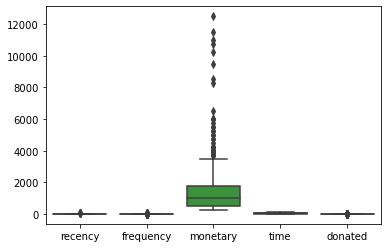

In [114]:
sns.boxplot(data = df)

<AxesSubplot:>

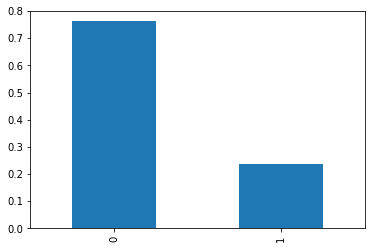

In [39]:
df.donated.value_counts(normalize=True).plot(kind='bar')

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

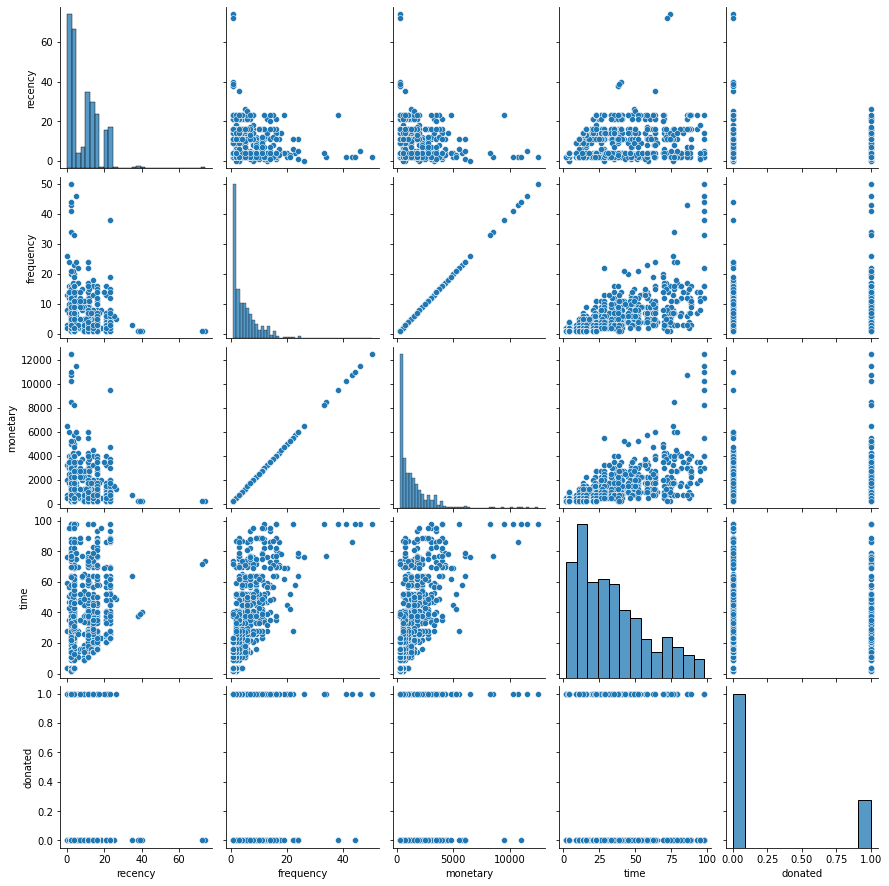

In [18]:
sns.pairplot(df)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [33]:
df.columns

Index(['recency', 'frequency', 'monetary', 'time', 'donated'], dtype='object')

In [47]:
feature_cols = ['recency', 'frequency', 'monetary', 'time']
target_col = 'donated'

In [56]:
X = df[feature_cols]
y = df[target_col]

In [57]:
df.shape

(748, 5)

In [60]:
X.shape

(748, 4)

In [124]:
scaler = StandardScaler()

Xs = scaler.fit_transform(X)

In [127]:
test_size = X.shape[0] - 500

In [128]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = test_size)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [67]:
model = DecisionTreeClassifier()
print(model)

DecisionTreeClassifier()


In [68]:
print(type(model))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


# Step 9: Fit the Model

In [129]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [130]:
print('Training score = %s' % model.score(X_train, y_train))
print('Test score = %s ' % model.score(X_test, y_test))

Training score = 0.936
Test score = 0.7943548387096774 


In [131]:
y_train_pred = model.predict(X_train)

In [132]:
y_test_pred = model.predict(X_test)

In [133]:
print('Accuracy score = %f' %accuracy_score(y_train, y_train_pred))
print('Precision score = %f' %precision_score(y_train, y_train_pred))
print('Recall score = %f' %recall_score(y_train, y_train_pred))
print('ROC/AUC score = %f' %roc_auc_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

Accuracy score = 0.936000
Precision score = 0.969388
Recall score = 0.766129
ROC/AUC score = 0.879075
[[373   3]
 [ 29  95]]


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [153]:
print('Accuracy score = %f' %accuracy_score(y_test, y_test_pred))
print('Precision score = %f' %precision_score(y_test, y_test_pred))
print('Recall score = %f' %recall_score(y_test, y_test_pred))
print('ROC/AUC score = %f' %roc_auc_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Accuracy score = 0.794355
Precision score = 0.538462
Recall score = 0.388889
ROC/AUC score = 0.648053
[[176  18]
 [ 33  21]]


In [154]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       194
           1       0.54      0.39      0.45        54

    accuracy                           0.79       248
   macro avg       0.69      0.65      0.66       248
weighted avg       0.78      0.79      0.78       248



# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

ANSWER:

With 79% accuracy, we are able to predict whether a blood donor donated blood in May 2007.



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



